<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/ex01_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MarkDown : Ctrl + M M
# 셀 삭제 : Ctrl + M D
# 셀 추가 : b

In [ ]:
# Colab 장점
# 1. 런타임 유형 변경 -> GPU 이용할 수 있다.
# 2. Google Drive랑 연동되어 코드를 언제 어디서든 확인 가능
# 3. 인기 라이브러리들이 미리 설치되어 있다.
# Colab 단점
# 1. 런타임 최대 24시간까지 밖에 유지되지 않는다.

## Text Mining
- 비정형 데이터(Ex. 텍스트)에서 의미(인사이트)를 추출하는 작업
- 자연어 처리 기술을 접목해서 최근 많이 수행되고 있음
  - 자연어 처리(NLP) : 사람의 언어(텍스트, 음성)를 컴퓨터가 이해할 수 있도록 처리하는 일련의 과정

### Text Mining Process
1. 텍스트 수집
2. 정제(전처리)
3. 토큰화
4. 수치화
5. 분석 & 적용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 작업 폴더랑 동일 경로로 맞춰주기
%cd /content/drive/MyDrive/ESTCampAI/TextMining

/content/drive/MyDrive/ESTCampAI/TextMining


### 1. 데이터 수집 및 로딩
- 스마일게이트의 한국어 혐오표현 데이터 셋 활용
- https://github.com/smilegate-ai/korean_unsmile_dataset

In [ ]:
import pandas as pd
# 훈련용 데이터, 평가용 데이터 불러오기
# colab 자동완성 ctrl + space
train = pd.read_csv('data/unsmile_train_v1.0.tsv', delimiter = "\t")
test = pd.read_csv('data/unsmile_train_v1.0.tsv', delimiter = "\t")

In [ ]:
display(train.head())
display(test.head())

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 결측치 확인(isnull().sum()도 가능.)
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

### 1. 빈도 분석
- 특정 혐오표현에서 많이 사용되는 단어는 어떠한 게 있는지?

In [ ]:
# 특정 혐오표현 텍스트가 들어있는 데이터만 필터링
text_train = train[train['지역'] == 1]['문장']
# 지역에 대한 혐오표현이 들어있는 문장만 가져오기

In [ ]:
# 띄어쓰기 중심으로 토큰화
area_tokens = [t for doc in text_train for t in doc.split(" ")]

tokens = []
for doc in text_train:
  for t in doc.split(" "):
    tokens.append(t)

In [ ]:
# 단어의 빈도 세기
from collections import Counter
counter = Counter(area_tokens) # 같은 단어의 개수 세기
counter

In [ ]:
counter.most_common(40)

[('전라도', 130),
 ('홍어', 48),
 ('존나', 40),
 ('진짜', 39),
 ('경상도', 38),
 ('새끼들', 33),
 ('다', 33),
 ('ㅋㅋㅋ', 30),
 ('ㅋㅋ', 29),
 ('전라도는', 27),
 ('쌍도', 26),
 ('더', 26),
 ('=', 25),
 ('개쌍도', 20),
 ('왜', 19),
 ('씨발', 19),
 ('시발', 18),
 ('서울', 18),
 ('그', 17),
 ('ㄹㅇ', 16),
 ('이', 15),
 ('전라도가', 15),
 ('사는', 15),
 ('저', 14),
 ('역시', 14),
 ('.', 14),
 ('제일', 13),
 ('라도', 13),
 ('홍어들', 13),
 ('그냥', 13),
 ('대구', 12),
 ('일베', 12),
 ('홍어가', 12),
 ('보면', 12),
 ('+', 12),
 ('있는', 11),
 ('좀', 11),
 ('뭐', 11),
 ('홍어새끼들', 10),
 ('전라도에', 10)]

In [ ]:
# 나눔 폰트(fonts-nanum)를 시스템에 설치
# '-y' 옵션은 설치 시 사용자에게 확인을 요구하지 않고 자동으로 진행되도록 함
!apt-get install -y fonts-nanum*

# 설치된 폰트를 시스템 폰트 캐시에 등록함
# 'fc-cache -fv' 명령은 폰트 캐시를 강제로 새로고침
!sudo fc-cache -fv

# Matplotlib의 캐시를 삭제
# '~/.cache/matplotlib' 폴더에 저장된 캐시 파일들을 모두 제거
# 이 과정은 새로운 폰트가 적용되지 않는 문제를 해결하는 데 유용
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

# 객체생성
wc = WordCloud(background_color = 'white', # 배경색 설정
               random_state = 715, # 난수 seed 고정, 결과 재현성
               font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
               # 다운받은 한글 폰트 설정
)

In [ ]:
area_tokens = " ".join(area_tokens) # 쪼개진 토큰을 하나의 문자열로 병합

In [ ]:
wc_rs = wc.generate_from_text(area_tokens)

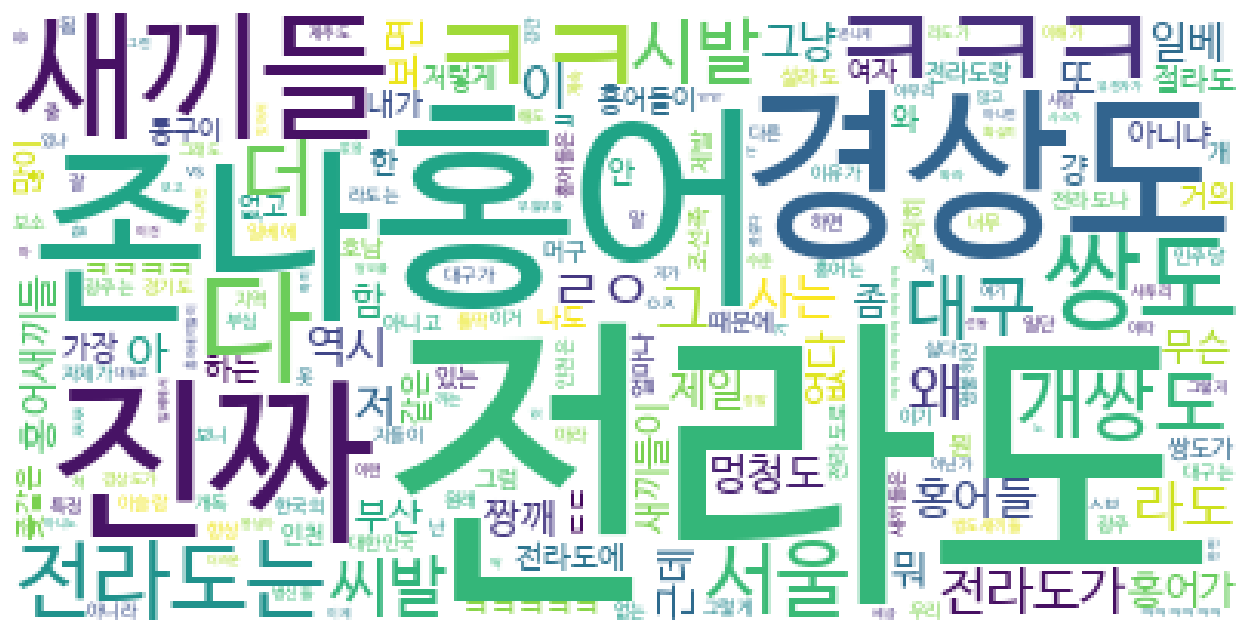

In [ ]:
# matplotlib으로 시각화
import matplotlib.pyplot as plt
plt.rc('font', family = "NamumBarunGothic")
plt.figure(figsize = (20, 8))
plt.imshow(wc_rs)
plt.axis('off')
plt.savefig("data/지역혐오.png")
plt.show()

# 1. "전라도" 뿐만 아니라 "전라도가", "전라도는", "절라도"는 같은 의미를 가지는 단어임에도 불구하고 컴퓨터는 다르게 받아들인다.
# 2. "다", "그" 등과 같이 분석에 불필요한 용어가 존재함 -> 불용어.

# 실제로 빈도분석(또는 키워드 분석) 수행 시 특정 프로세스가 필요하다.

### 2. 텍스트 분류
- 텍스트 마이닝 프로세스를 활용해보자.
### 데이터 전처리
#### 정제(Cleaning)
- 불용어 제거 : 불필요한 단어(또는 토큰)를 제거하는 작업
- 어간 추출 : 단어의 핵심 부분(어간)만 추출
- 표준어화 : 표현 방법을 표준어에 맞춰서 변경

### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰번호나 이메일처럼 패턴이 있는 문자열의 검색이나 치환을 위해서 프로그래밍 언어 대부분에서 지원하고 있다.
- https://wikidocs.net/21703

In [ ]:
import re # 정규표현식을 사용하기 위한 도구

In [ ]:
# 전화번호 검출 예시

p = re.compile("010-?[0-9]{4}-?\\d{4}")

# 010-?[0-9]{4}-?\\d{4} 패턴 설명
# 010 : 휴대폰 번호 010 고정
# -? : "-"아 둘어있을 수도 있고 없을 수도 있다(선택적)
# [0-9]{4} : 0~9 숫자가 정확히 4번 반복됨
# \\d{4} : 숫자가 4번 반복된다.

In [ ]:
p.search('전화번호 : 010-1234-5678')

<re.Match object; span=(7, 20), match='010-1234-5678'>

In [ ]:
p.search('전화번호 : 0101234-5678')

<re.Match object; span=(7, 19), match='0101234-5678'>

In [ ]:
p.search('전화번호 : 010-12345678')

<re.Match object; span=(7, 19), match='010-12345678'>

In [ ]:
p.search('전화번호 : 01012345678')

<re.Match object; span=(7, 18), match='01012345678'>

In [ ]:
p.search('전화번호 : 010-134-5678') # 가운데 번호가 하나 생략된 경우(매칭X)

In [ ]:
# 패턴생성
p = re.compile('[ㅋㅎㄷㅇ~!?.\\-ㅡ0-9a-z]+')

# 정규 표현식 패턴 설명:
# - "[...]": 대괄호 내부에 포함된 문자 중 하나와 일치하는 문자들을 의미
# - "ㅋㅎㄷㅇ": 'ㅋ', 'ㅎ', 'ㄷ', 'ㅇ' 중 하나의 문자가 들어간 부분을 매칭
#               (한국어에서 자주 쓰이는 인터넷 표현: 'ㅋㅋ', 'ㅎㅎ', 'ㄷㄷ', 'ㅇㅇ' 등)
# - "~!?.\\-": 틸드(~), 느낌표(!), 마침표(.), 물음표(?), 하이픈(-) 중 하나와 일치.
#              여기서 `\\`는 이스케이프 문자로, `\-`를 문자 그대로 인식하도록 처리
# - "ㅡ": 한글 모음 'ㅡ'를 포함
# - "0-9": 0부터 9까지의 숫자 중 하나와 일치함
# - "a-z": 소문자 알파벳(a부터 z까지) 중 하나와 일치
# - "+": 해당 문자 집합이 한 번 이상 반복될 수 있음을 의미